<a href="https://colab.research.google.com/github/SushSushmithagowda/ML-101-projects/blob/main/bike%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/bike_buyers.csv',sep=',')

In [ ]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [1]:
df.isnull()

NameError: ignored

In [ ]:
df1 = df.dropna()

In [ ]:
df1.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [ ]:
df1.shape

(952, 13)

In [ ]:
df1.columns

Index(['ID', 'Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Purchased Bike'],
      dtype='object')

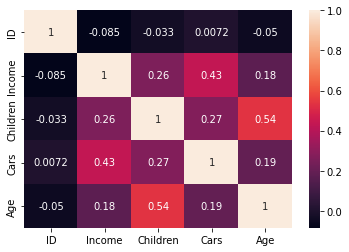

In [ ]:
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

ANALYSING NUMERICAL VARIABLES

In [ ]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables
The numerical variables are : ['ID', 'Income', 'Children', 'Cars', 'Age']


In [ ]:
df1[numerical].head()

,ID,Income,Children,Cars,Age
0,12496,40000.0,1.0,0.0,42.0
1,24107,30000.0,3.0,1.0,43.0
2,14177,80000.0,5.0,2.0,60.0
4,25597,30000.0,0.0,0.0,36.0
5,13507,10000.0,2.0,0.0,50.0


In [ ]:
df1[numerical].isnull().sum()

ID          0
Income      0
Children    0
Cars        0
Age         0
dtype: int64

In [ ]:
categorical = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 8 categorical variables
The categorical variables are : ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']


In [ ]:
df1[categorical].head()

,Marital Status,Gender,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,Married,Female,Bachelors,Skilled Manual,Yes,0-1 Miles,Europe,No
1,Married,Male,Partial College,Clerical,Yes,0-1 Miles,Europe,No
2,Married,Male,Partial College,Professional,No,2-5 Miles,Europe,No
4,Single,Male,Bachelors,Clerical,No,0-1 Miles,Europe,Yes
5,Married,Female,Partial College,Manual,Yes,1-2 Miles,Europe,No


In [ ]:
df1[categorical].isnull().sum()

Marital Status      0
Gender              0
Education           0
Occupation          0
Home Owner          0
Commute Distance    0
Region              0
Purchased Bike      0
dtype: int64

In [ ]:
#view frequency counts in categorical variables
for var in categorical:
  print(df1[var].value_counts())
  print(df1[var].value_counts()/np.float(len(df1)))
  print()

Married    518
Single     434
Name: Marital Status, dtype: int64
Married    0.544118
Single     0.455882
Name: Marital Status, dtype: float64

Male      479
Female    473
Name: Gender, dtype: int64
Male      0.503151
Female    0.496849
Name: Gender, dtype: float64

Bachelors              292
Partial College        252
High School            173
Graduate Degree        163
Partial High School     72
Name: Education, dtype: int64
Bachelors              0.306723
Partial College        0.264706
High School            0.181723
Graduate Degree        0.171218
Partial High School    0.075630
Name: Education, dtype: float64

Professional      263
Skilled Manual    242
Clerical          169
Management        166
Manual            112
Name: Occupation, dtype: int64
Professional      0.276261
Skilled Manual    0.254202
Clerical          0.177521
Management        0.174370
Manual            0.117647
Name: Occupation, dtype: float64

Yes    652
No     300
Name: Home Owner, dtype: int64
Yes    0.6848

In [ ]:
#check for cardinality in categorical variables
for var in categorical:
  print(var, 'contains', len(df1[var].unique()), 'lables')

Marital Status contains 2 lables
Gender contains 2 lables
Education contains 5 lables
Occupation contains 5 lables
Home Owner contains 2 lables
Commute Distance contains 5 lables
Region contains 3 lables
Purchased Bike contains 2 lables


In [ ]:
df1.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No


LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()



In [ ]:
df1['Marital Status'] = le.fit_transform(df1['Marital Status'])
df1['Gender'] = le.fit_transform(df1['Gender'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
